# 1. Simple coin flip exercise

You have a coin that when flipped ends up head with probability $p$ and ends up tail with probability $1−p$. The value of $p$ is unknown.

Flipping the coin $\bf{n}$ times you end up with $\bf{k}$ heads. The objective of this exercise is to estimate the probability distribution of $p$ using this data.

Credits: 
- Panos Ipeirotis, https://www.behind-the-enemy-lines.com/2008/01/are-you-bayesian-or-frequentist-or.html

## Import librairies

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import scipy.special as sc
from scipy.stats import beta     # beta probability distribution function

## Parameters of the exercise

In [2]:
k,n = 100,140 # number of heads and trials

> 1. What could be a coarse estimation of $p$?

$$

\hat{p} = \frac{k}{n} = \frac{100}{140} \approx 0.71

$$

## Bayesian treatment: mathematical approach

We will see that, for this particular exercice, it is actually straightforward to access p. Here, p is not a value, it's a distribution and to compute it we start from the Bayes rule:

$$
P(p|data) = \frac{P(data | p) P(p)}{P(data)},
$$

where $P(data | p)$ is given by the Binomial distribution which determines the probability of observing k "heads" in  n flip when the probability of success (head result) is given by p:

$$
P(data|p) = P(k|p,n) = \binom nk p^k (1-p)^{n-k}, \,\,\, \text{with the binomial coefficient: } \binom nk = \frac{n!}{k! (n-k)!}.
$$


Now, for the prior distribution $P(p)$, a very convenient choice for this scenario (also known as the conjugate prior of the binomial) is the <a href="https://en.wikipedia.org/wiki/Beta_distribution#Shapes">Beta distribution</a>, $Beta(p|a,b)$ defined as:

$$
Beta(p|a,b) =  \frac{1}{B(a,b)} p^{a-1}(1-p)^{b-1}
$$

where $B$ is the <a href="https://en.wikipedia.org/wiki/Beta_function">beta function</a> (not to be mistaken with the beta distribution !) and is a normalization constant to ensure that the probability integrates to 1. A distribution $Beta(p|a,b)$ has a mean of $\frac{a}{a+b}$.

---

> 2. With some simple calculations, show that the posterior is of the same distribution family as the prior (Beta distribution) and that the posterior distribution comes down to:

$$
P(p|data) = Beta(p|k+a, n - k + b) 
$$

***Thus the posterior of this problem depends of the data (k and n) and the two parameters (a and b) that defines the prior !***

From Bayes rule and using Beta distribution as prior distribution:

$$
P(p|data) = \frac{P(data | p) P(p)}{P(data)} = \frac{1}{P(data)} \binom nk p^k (1-p)^{n-k} \frac{1}{B(a,b)} p^{a-1}(1-p)^{b-1}
$$

$$
\Rightarrow P(p|data) = \frac{1}{P(data)} \binom nk \frac{1}{B(a,b)} p^{(a+k)-1}(1-p)^{(b + n - k)-1}
$$

Multiplying and dividing by $B(k+a, n-k+b)$, we get:

$$
P(p|data) = \frac{1}{P(data)} \binom nk \frac{B(k+a, n-k+b)}{B(a,b)} \frac{1}{B(k+a, n-k+b)} p^{(a+k)-1}(1-p)^{(b + n - k)-1}
$$

However, we know that since $P(p|data)$ is a distribution with respect to $p$, we have $\int_{0}^{1}P(p|data) dp = 1$.

Similarly, we also know that $\int_{0}^{1}Beta(p|a,b) dp = 1$ for all valid a,b.

Integrating our previous equation:

$$
\int_{0}^{1}P(p|data) dp = \frac{1}{P(data)} \binom nk \frac{B(k+a, n-k+b)}{B(a,b)} \int_{0}^{1} \frac{1}{B(k+a, n-k+b)} p^{(a+k)-1}(1-p)^{(b + n - k)-1}
$$

$$
1 = \frac{1}{P(data)} \binom nk \frac{B(k+a, n-k+b)}{B(a,b)}
$$

We then get:

$$
P(p|data) = \frac{1}{P(data)} \binom nk \frac{B(k+a, n-k+b)}{B(a,b)} \frac{1}{B(k+a, n-k+b)} p^{(a+k)-1}(1-p)^{(b + n - k)-1} 
$$

$$
\Rightarrow P(p|data) = \frac{1}{B(k+a, n-k+b)} p^{(a+k)-1}(1-p)^{(b + n - k)-1}
$$

$$
\Rightarrow p|data \sim Beta(a+k, b+n-k)
$$

## 1.1. Prior and posterior distributions

The Beta distribution, for parameters $a$ and $b$, is given by the function ```beta.pdf(x,a,b)``` 

> 3. Plot the shape of the prior for different values of a and b.


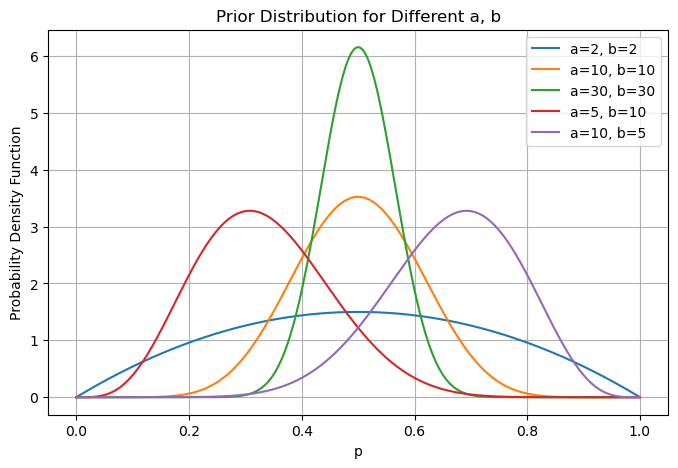

In [3]:
a = [2,10,30,5,10]
b = [2,10,30,10,5]

p = np.linspace(0, 1, 1000)

plt.figure(figsize=(8, 5))
for i in range(len(a)):
    y = beta.pdf(p, a[i], b[i])
    plt.plot(p, y, label=f'a={a[i]}, b={b[i]}')
    
plt.title('Prior Distribution for Different a, b')
plt.xlabel('p')
plt.ylabel('Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

> 4. Why could it be a good choice to choose a symmetric ($a=b$) prior?

Choosing a symmetric distribution as prior seems coherent since, when we haven't seen any new observations, we shouldn't assume we are more or less likely to obtain heads or tails in the next throws. We should thus assume a fair coin and aggregate the new information after having observed new data, where $p|data \sim Beta(a+k, b+n-k)$.

### 1.1.a) Model 1: uniform prior

> 5. For Model 1, choose an uniform prior ($a_1=b_1=1$) and plot the corresponding posterior distribution. 

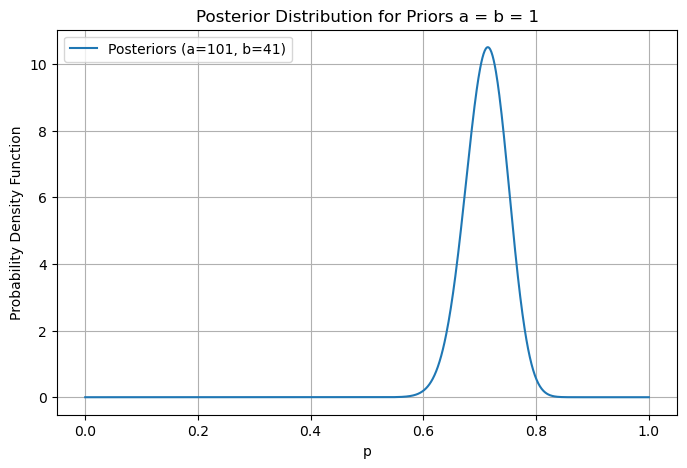

In [4]:
a_1 = 1
b_1 = 1
p = np.linspace(0, 1, 1000)

posterior_pdf_1 = beta.pdf(p, k+a_1, n-k+b_1)

plt.figure(figsize=(8, 5))
plt.plot(p, posterior_pdf_1, label=f'Posteriors (a={k+a_1}, b={n-k+b_1})')
plt.title('Posterior Distribution for Priors a = b = 1')
plt.xlabel('p')
plt.ylabel('Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

> 6. Derive the MAP estimator and MMSE estimator (i.e. averaged $p$) for model 1. Is it consistent with your coarse estimation of $p$? How do they behave with the amount of data ($k$ and $n$)?

The MAP (maximum a Posteriori) estimator is the value of $p$ which maximizes the posterior probability $p|data \sim Beta(a+k, b+n-k)$.

$$
\frac{d f_{B(a+k,b+n-k)}}{dp} = \frac{1}{B(a+k,b+n-k)} \frac{d(p^{a+k-1}(1-p)^{b+n-k-1})}{dp}
$$

$$
\Rightarrow \frac{d f_{B(a+k,b+n-k)}}{dp} = \frac{1}{B(a+k,b+n-k)} p^{a+k-2}(1-p)^{b+n-k-2} ((a-1) - p(a + b - 2)) 
$$

$$
\Rightarrow \hat{p}_{MAP} = \frac{a+k-1}{a+b+n-2}
$$

Where this value is a maximum since the function $f_{B(a+k,b+n-k)}$ is concave in the interval $[0,1]$.

Particularly for $a_1 = b_1 = 1$ we get $\hat{p}_{MAP1} = \frac{k}{n} \approx 0.714$, which is exactly our coarse estimation of $p$.

The MMSE (Minimum Mean Square Error) estimator is the  expected value of $p|data \sim Beta(a+k, b+n-k)$. Since we know that the distribution $Beta(p|a,b)$ has a mean of $\frac{a}{a+b}$, the velue we get is given by:

$$
\hat{p}_{MMSE} = \frac{a+k}{a+b+n}
$$

Particularly for $a_1 = b_1 = 1$ we get $\hat{p}_{MMSE1} = \frac{k+1}{n+2} \approx 0.711$, which doesn't correspond to our coarse estimation of $p$.

When we increase the value of k (i.e., the amount of head flips increases) keeping our $n$ unchanged, our values for both estimators also increase. This makes sense since after having seen more heads we can update our priors and consider the coin is biased towards heads. Similarly, if we increase $n$ when $k$ remains unchanged, the proportion of tails we have seen increases and the coin may be biased towards tails.

Moreover, when we increase our data, the MMSE estimator converges to our coarse estimation of $p$.

In [5]:
print(f"p_MAP1 = {round((a_1+k-1)/(a_1+b_1+n-2),3)}")
print(f"p_MMSE1 = {round((a_1+k)/(a_1+b_1+n),3)}")

p_MAP1 = 0.714
p_MMSE1 = 0.711


### 1.1.b) Model 2: peaked prior

> 7. Now, for Model 2, plot the posterior distribution for a 'peaked' prior (e.g. $a_2=b_2=10$) and comment in comparison to Model 1.

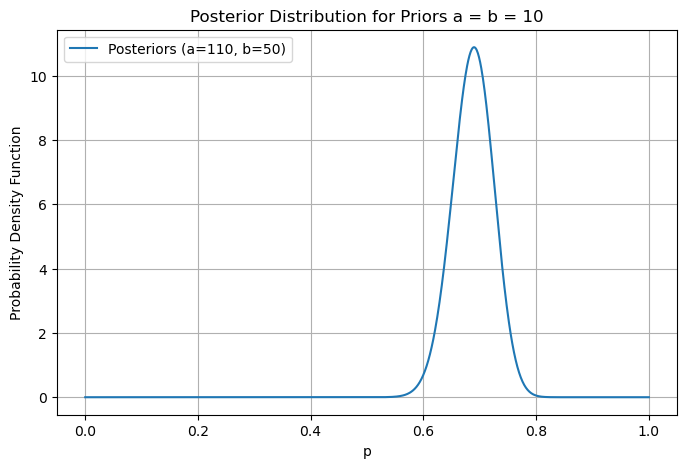

In [6]:
a_2 = 10
b_2 = 10
p = np.linspace(0, 1, 1000)

posterior_pdf_2 = beta.pdf(p, k+a_2, n-k+b_2)

plt.figure(figsize=(8, 5))
plt.plot(p, posterior_pdf_2, label=f'Posteriors (a={k + a_2}, b={n - k + b_2})')
plt.title('Posterior Distribution for Priors a = b = 10')
plt.xlabel('p')
plt.ylabel('Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

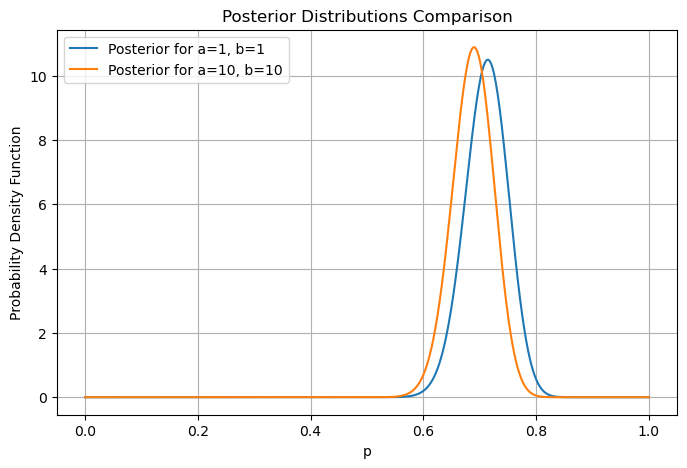

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(p, posterior_pdf_1, label=f'Posterior for a={a_1}, b={b_1}')
plt.plot(p, posterior_pdf_2, label=f'Posterior for a={a_2}, b={b_2}')
plt.title('Posterior Distributions Comparison')
plt.xlabel('p')
plt.ylabel('Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

We can observe that the second curve (with $a=b=10$) has both a higher peak and a mean value closer to 0.5. The fact that the peak is higher comes from having observed more coin flips, i.e. having more data to build our posterior distribution. Having a mean value closer to $p=0.5$ also makes sense intuitively, since we have a same proportion of heads and tails in both scenarios but a higher data amount in the second one, making us more confident in our priors.

> 8. Derive the MAP estimator and MMSE estimator (i.e. averaged $p$) for Model 2. Comment in comparison to Model 1.

We can use the same results obtained for the previous model but replacing with $a_2 = b_2 = 10$. We thus get:

$$
\hat{p}_{MAP} = \frac{a+k-1}{a+b+n-2} \Rightarrow \hat{p}_{MAP2} = \frac{k+9}{n+18} \approx 0.690
$$

$$
\hat{p}_{MMSE} = \frac{a+k}{a+b+n} \Rightarrow \hat{p}_{MMSE2} = \frac{k+10}{n+20} \approx 0.688
$$

When comparing with model 1, we see that the new estimators are farther from our coarse value for $p$, which makes sense since our prior is stronger for the hypothesis of a fair coin where $p=0.5$. These new estimators are more shiftet towards $0.5$ when compared to the previous ones.

In [8]:
print(f"p_MAP2 = {round((a_2+k-1)/(a_2+b_2+n-2),3)}")
print(f"p_MMSE2 = {round((a_2+k)/(a_2+b_2+n),3)}")

p_MAP2 = 0.69
p_MMSE2 = 0.688


### 1.1.c) Model 3: Very peaked prior

> 9. For Model 3, plot the posterior distribution for a 'peaked' prior (e.g. $a_3=b_3=100$) and comment in comparison to Models 1 and 2.

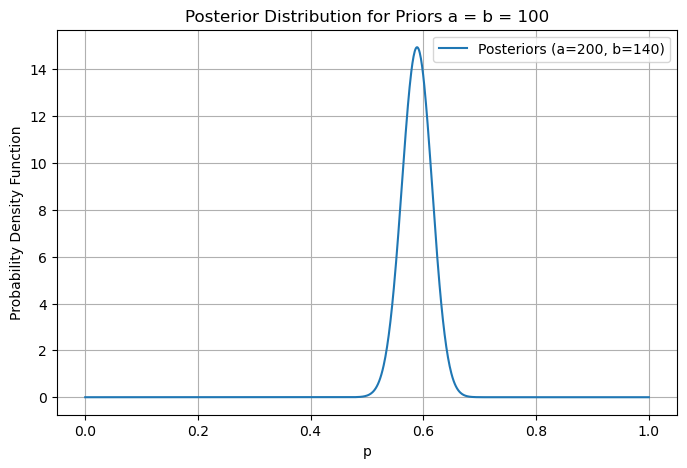

In [9]:
a_3 = 100
b_3 = 100
p = np.linspace(0, 1, 1000)

posterior_pdf_3 = beta.pdf(p, k+a_3, n-k+b_3)

plt.figure(figsize=(8, 5))
plt.plot(p, posterior_pdf_3, label=f'Posteriors (a={k + a_3}, b={n - k + b_3})')
plt.title('Posterior Distribution for Priors a = b = 100')
plt.xlabel('p')
plt.ylabel('Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

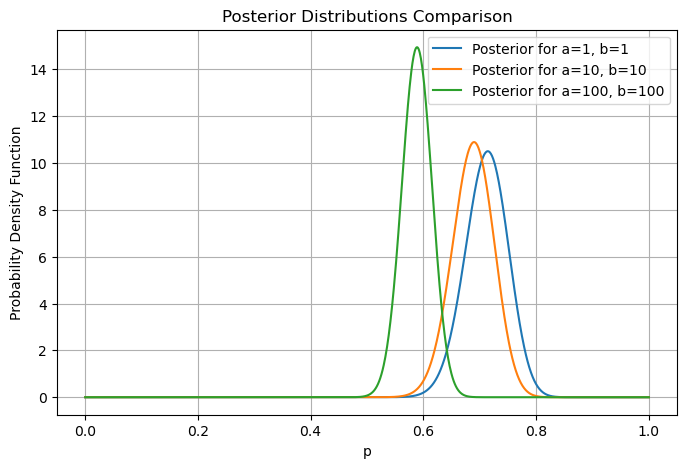

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(p, posterior_pdf_1, label=f'Posterior for a={a_1}, b={b_1}')
plt.plot(p, posterior_pdf_2, label=f'Posterior for a={a_2}, b={b_2}')
plt.plot(p, posterior_pdf_3, label=f'Posterior for a={a_3}, b={b_3}')
plt.title('Posterior Distributions Comparison')
plt.xlabel('p')
plt.ylabel('Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

We graphically see the same changes from model 2 to 3 as we did from model 1 to 2 but more pronounced. There is both a higher peak and the distribution is more shifted towards $p=0.5$.

> 10. Derive the MAP estimator and MMSE estimator (i.e. averaged $p$) for model 1. Comment in comparison to Models 1 and 2.

We get, for $a_3 = b_3 =  100$:

$$
\hat{p}_{MAP} = \frac{a+k-1}{a+b+n-2} \Rightarrow \hat{p}_{MAP3} = \frac{k+99}{n+198} \approx 0.589
$$

$$
\hat{p}_{MMSE} = \frac{a+k}{a+b+n} \Rightarrow \hat{p}_{MMSE3} = \frac{k+100}{n+200} \approx 0.588
$$

When comparing the three models, we see that the higher the values of $a=b$, the closer to 0.5 are our estimators.

In [11]:
print(f"p_MAP2 = {round((a_3+k-1)/(a_3+b_3+n-2),3)}")
print(f"p_MMSE2 = {round((a_3+k)/(a_3+b_3+n),3)}")

p_MAP2 = 0.589
p_MMSE2 = 0.588


## 1.2. Bayes factor

For comparing the plausibility of two models, we can resort to <a href="https://en.wikipedia.org/wiki/Bayes_factor">Bayes factors</a>.

The Bayes factor is the ratio of the marginal likelihoods of the two models, that is, the likelihoods of two statistical models integrated over the prior probabilities of their parameters. Here instead of comparing models, we can now also compare hypotheses encoded in the form of priors.

The marginal likelihood is given by:
$$
P(data) = \int P(data | p)P(p)dp
$$

The Bayes factor K for comparing the plausibility of two models is:
$$
K = \frac{P(data | \text{Model}_1)}{P(data | \text{Model}_2)} = \frac{\int P(data | p,  \text{Model}_1)P(p |  \text{Model}_1)dp}{\int P(data | p,  \text{Model}_2)P(p |  \text{Model}_2)dp}.
$$

A value of K > 1 means that Model1 is more strongly supported by the data under consideration than Model2. The relative strength of a Bayes factor can be determined by consulting the <a href="https://en.wikipedia.org/wiki/Bayes_factor#Interpretation">interpretation tables</a>.


For the binomial model (with a conjugate Beta prior) the Bayes factor is easily calculated:

$$
K = \frac{P(data | \text{Model}_1)}{P(data | \text{Model}_2)}  = \frac{B(k+a_1,n-k+b_1)}{B(a_1,b_1)} \times \frac{B(a_2,b_2)}{B(k+a_2,n-k+b_2)}.
$$

Here $B$ is the beta function.

> 11. Calculate the Bayes factors corresponding to the comparison of the three models used above (uniform prior, 'peaked' prior and 'very peakd' prior). Hint: to ease numerical calculation it is better to consider the logarithm of the beta function ```sc.betaln``` (instead of the beta function ```sc.beta``` that can have very low values). Conclude on which model to choose.

In [12]:
K_1_2 = np.exp(sc.betaln(k + a_1, n - k + b_1) - sc.betaln(a_1, b_1)) / np.exp(sc.betaln(k + a_2, n - k + b_2) - sc.betaln(a_2, b_2))
K_2_3 = np.exp(sc.betaln(k + a_2, n - k + b_2) - sc.betaln(a_2, b_2)) / np.exp(sc.betaln(k + a_3, n - k + b_3) - sc.betaln(a_3, b_3))
K_1_3 = np.exp(sc.betaln(k + a_1, n - k + b_1) - sc.betaln(a_1, b_1)) / np.exp(sc.betaln(k + a_3, n - k + b_3) - sc.betaln(a_3, b_3))

print(f"Bayes factor K_1_2 = {K_1_2}")
print(f"Bayes factor K_2_3 = {K_2_3}")
print(f"Bayes factor K_1_3 = {K_1_3}")

Bayes factor K_1_2 = 1.4569931039824116
Bayes factor K_2_3 = 240.62184947369246
Bayes factor K_1_3 = 350.5843753506638


We see that model 1 is the best among the three, and it is slightly better than model 2 and a lot better than model 3.

## 1.3. Making predictions

In Bayesian inference we can use our probabilistic statements about the parameter from the posterior for making predictions. This is usually refered to as <a href="https://en.wikipedia.org/wiki/Posterior_predictive_distribution">posterior predictive distribution</a>. 


This is the distribution of unobserved data, conditioned on observed data and prior. It follows the idea as the marginal likelihood discussed above (which can be seen as a prior predictive distribution), namely that we want to evaluate new data on our fitted model. 

We can write the posterior predictive distribution for some new unseen data $x$, as the marginal of a distribution conditioned on observed data and prior:

$$
P(x |data) = \int P(x|p)P(p |data)dp
$$

where $data$ refers to our training data, and $x$ to some new unseen data.

> 12. For the beta-binomial model, compute $P(j | m,k,n,a,b)$ where $j$ refers to the new number of Heads, $m$ to the new number of total flips, $k$ to the previous number of Heads, $n$ to the previous number of total flips, and $a$ and $b$ to our prior hyperparameters.


$$
P(j | m,k,n,a,b) = \int 
P(j|m,p)P(p |k,n,a,b)dp= \binom{m}{j} \frac{B(k+j+a,n-k+m-j+b)} {B(a+k,b+n-k)}
$$


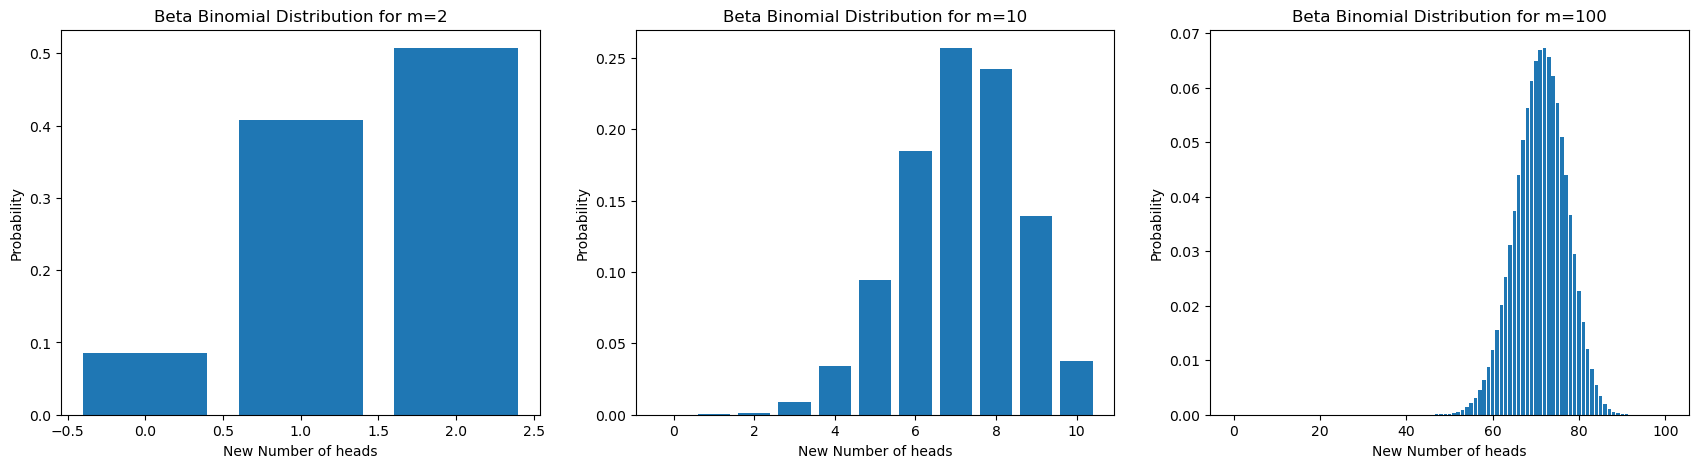

In [13]:
def beta_binomial_pdf(j,m,k,n,a,b):
    beta_new = sc.betaln(k+j+a, n-k+m-j+b)
    beta_post = sc.betaln(a+k, b+n-k)
    return sc.comb(m, j) * np.exp(beta_new - beta_post)

# Using the model that better fits the data
a = 1
b = 1
m_values = [2, 10, 100]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 5))

for i, m in enumerate(m_values):
    j_values = np.arange(0,m+1,1)
    probas = [beta_binomial_pdf(j,m,k,n,a,b) for j in j_values]
    axes[i].bar(j_values, probas)
    axes[i].set_title(f'Beta Binomial Distribution for m={m}')
    axes[i].set_xlabel('New Number of heads')
    axes[i].set_ylabel('Probability')
plt.show()

> 13. Calculate the probability of flipping 2 heads out of 2 new flips with the model you selected as the best in the previous question
>
> 14. Calculate the probability of flipping 3 heads out of 5 new flips with the model you selected as the best in the previous question

In [14]:
print(f'The probability of 2 heads out of 2 new flips is {beta_binomial_pdf(2,2,k,n,a,b)}')
print(f'The probability of 3 heads out of 5 new flips is {beta_binomial_pdf(3,5,k,n,a,b)}')

The probability of 2 heads out of 2 new flips is 0.5073377326898485
The probability of 3 heads out of 5 new flips is 0.2951781356488044


> 15. What can you conclude about the quality of these predictions? How will the prediction probability behave with increasing number of new flips? Check by producing the plot of the prediction probability of any $j$ with values of m between $1$ and $200$ for instance.

Considering the coin initially gave as outcome $100$ heads out of $140$ throws and that our prior was an uniform probability over $[0,1]$, the predictions seem to have good quality. 

When we increase the number of flips, our model would decrease in quality and we would be able to update the probability distribution conditioned on the new set of data observed.

In the graphs below we see that for any $j$, at a given $n$ we would reach a maximum proability of observation (when $j/n = p_{posterior}$) followed by a decrease.

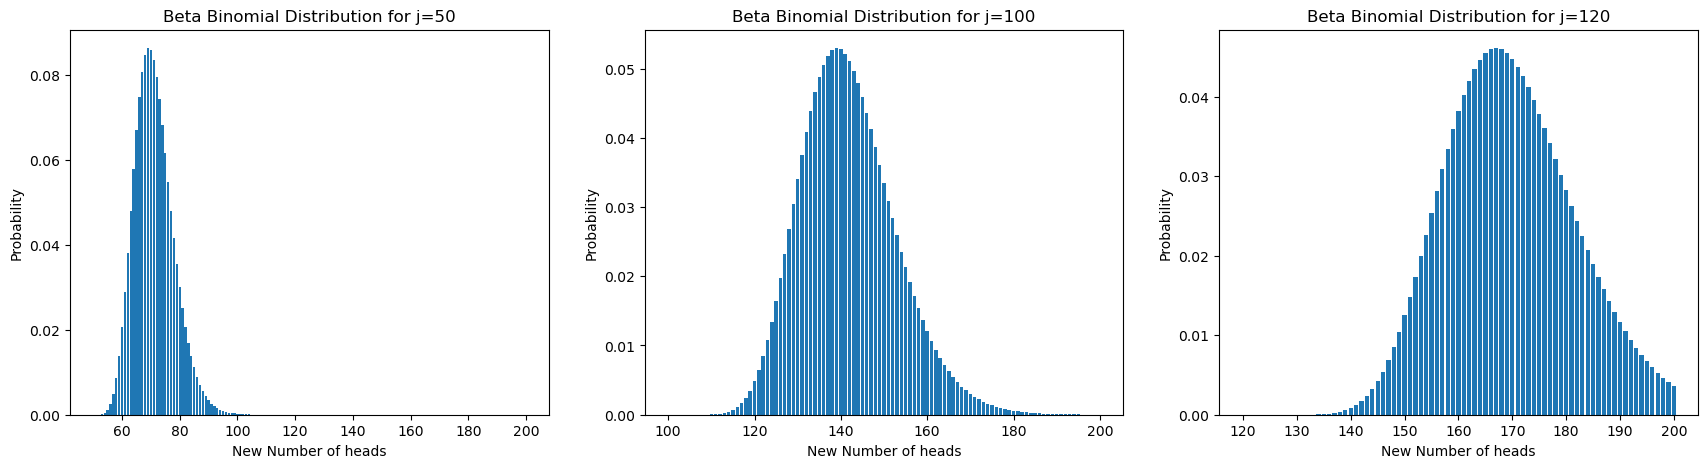

In [15]:
# Using the model that better fits the data
a = 1
b = 1
j_values = [50, 100, 120]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 5))

for i, j in enumerate(j_values):
    m_values = np.arange(j,201,1)
    probas = [beta_binomial_pdf(j,m,k,n,a,b) for m in m_values]
    axes[i].bar(m_values, probas)
    axes[i].set_title(f'Beta Binomial Distribution for j={j}')
    axes[i].set_xlabel('New Number of heads')
    axes[i].set_ylabel('Probability')
plt.show()

# 2. The lighthouse problem

The following is a classic estimation problem called the "lighthouse problem". The figure shows a set of receivers distributed at coordinates $x_k$ along the shore and a lighthouse located at some position $(\alpha,\beta)$ offshore. The idea is that the coastline is equipped with a continuous strip of photodetectors. The lighthouse flashes the shore $N$ times at some random angle $\theta_k$. The strip of  photodetectors registers the $k^{th}$ flash position $x_k$, but the angle $\theta_k$ of the flash is unknown. Furthermore, the lighthouse beam is laser-like so there is no smearing along the strip of photodetectors. In other words, the lighthouse is actually more of a disco-ball in a dark nightclub.

The problem is how to estimate $\alpha$ given we already have $\beta$.

Credits:
- Data Analysis: Bayesian tutorial. D.S.Sivia.

<img src="Lighthouse_schematic.jpg" width="600">

Given the nature of the lighthouse emission it seems reasonable to assign an uniform density function to the angle $\theta_k$, such that it is uniformly distributed between $\pm \pi/2$:
$$ P(\theta_k|\alpha, \beta) = \frac{1}{\pi} $$

Now, what we really want is the density function for $x_k$ which will tell us the probability that the $k^{th}$ flash will be recorded at position $ x_k $. From basic trigonometry, we have the following:

$$ \beta \tan(\theta_k) = x_k - \alpha $$

Thus, after a transformation of variables, we obtain the following:

$$ P(x_k|\alpha, \beta) = \frac{\beta}{\pi \left[\beta ^2 +(x_k-\alpha)^2 \right]}. $$

This distribution is known as the [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution).




## 2.1. Data generation

First we'll generate some toy data that will be used in this exercise. We assume that the 'true' values of the parameters that we want to infer are $\alpha = \beta = 1$.

> 16. Run the cell below to generate N=250 values of the angle $\theta_k$ uniformely distributed between $-\pi/2$ and $+\pi/2$ and to calculate the corresponding $x_k$ values.
>
> 17. Make a histogram of the $\theta_k$ and $x_k$ values
>
> 18. Define the function $P(x_k|\alpha, \beta)$ and draw it for fixed $\alpha = \beta = 1$ values.

Exercise 16
Exercise 17


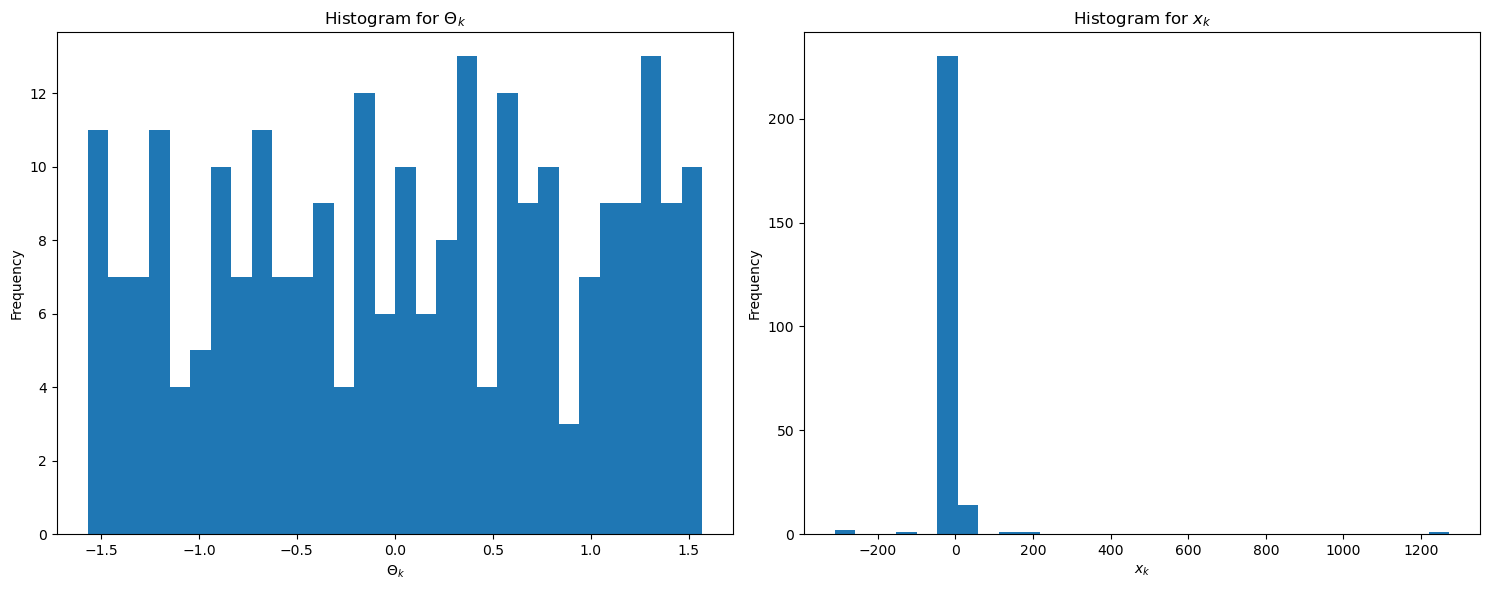

Exercise 18


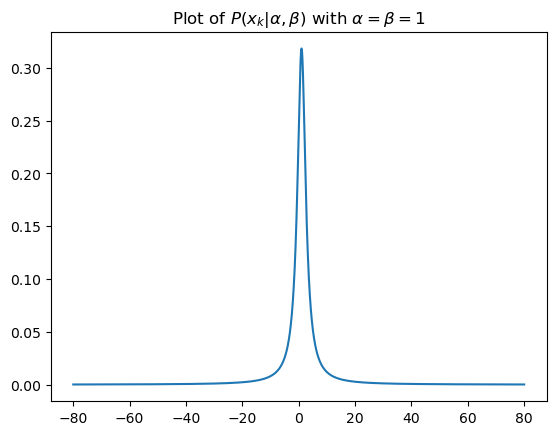

In [16]:
# 16)
N = 250
alpha = 1
beta = 1

def generate_data(N):
    thetas = np.random.uniform(-np.pi/2, np.pi/2, N)
    x_samples = beta*np.tan(thetas) + alpha
    return thetas, x_samples

thetas, x_samples = generate_data(N)

print("Exercise 16")
plt.figure(figsize=(15, 6))

# 17)

print("Exercise 17")

plt.subplot(1, 2, 1)
plt.hist(thetas, bins = 30)
plt.title("Histogram for $\Theta_{k}$")
plt.xlabel("$\Theta_{k}$")
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(x_samples, bins = 30)
plt.title('Histogram for $x_{k}$')
plt.xlabel("$x_{k}$")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 18)
def p_cauchy(x, alpha, beta):
    return beta / (np.pi * (beta**2) + (x - alpha)**2)

xs_plot = np.linspace(-80, 80, 10000)
ps = p_cauchy(xs_plot, alpha, beta)

print("Exercise 18")
plt.plot(xs_plot, ps)
plt.title(r"Plot of $P(x_k|\alpha, \beta)$ with $\alpha = \beta = 1$")
plt.show()

## 2.2. Bayesian inference

Given a set of observed measurements $\{x_k\}$ we can infer the position along the shore of the lighthouse, $\alpha$, by the posterior pdf $P(\alpha|\{x_k\},\beta)$. Here, to simplify the problem, we assume that the distance to the coast, $\beta$, is known. Writing down the Bayes theorem we have:

$$
P(\alpha|\{x_k\},\beta) \propto P(\{x_k\}|\alpha,\beta) P(\alpha|\beta).
$$

As the knowledge of $\beta$, without the data, tells us nothing new about the position $\alpha$, let us assign a single uniform pdf to the prior:

$$
P(\alpha|\beta) = P(\alpha) \begin{cases}
 A & \alpha_\text{min} \leq \alpha \leq \alpha_\text{max} \\
 0 & \text{otherwise}
\end{cases}
$$

where $A$ is a constant and $\alpha_\text{min}$ and $\alpha_\text{max}$ represent the limit of the coastline.

$P(\{x_k\}|\alpha,\beta)$ is the likelihood of the data that is just the product of the probabilities for obtaining the N individual observations $x_k$:

$$
P(\{x_k\}|\alpha,\beta) = \prod_{k=1}^N P(x_k|\alpha,\beta).
$$

From the equations above one can write the logarithm of the posterior distribution as:

$$\mathcal{L}(\alpha)= \log P(\alpha|\{x_k\},\beta) = \text{constant}- \sum_{k=1}^N \ln \left[ \beta^2 + (x_k-\alpha)^2 \right]
$$

The MAP estimate of the position $\alpha$ is given by the maximum of the posterior pdf. Taking the first derivative gives us the equation we would have to solve:

$$
\frac{d \mathcal{L}}{d \alpha} = 2 \sum_{k=1}^N \frac{x_k-\alpha}{\beta^2+(x_k-\alpha)^2}=0.
$$

Unfortunately, there is no easy way to solve for the optimal $\alpha$ for this equation. However, nothing can prevent us from addressing this problem numerically.

For this we will use brute force to evaluate $\mathcal{L}(\alpha)$ for a range of possible values $\alpha$:

> 19. Implement the function $\mathcal{L}(\alpha)$. We can ignore the constant in this expression as we will deal with it below,
>
> 20. Calculate $\mathcal{L}(\alpha)$ with the available data and for a grid of values in the range $3 \leq \alpha \leq 3$. Then subtract the maximum value of $\mathcal{L}(\alpha)$ to $\mathcal{L}(\alpha)$
>
> 21. Finally plot the posterior distribution $P(\alpha|\{x_k\},\beta) = \exp(\mathcal{L}(\alpha))$ as a function of $\alpha$.
>
> 22. Print out the maximum posterior estimate

maximum posterior estimate = 1.061


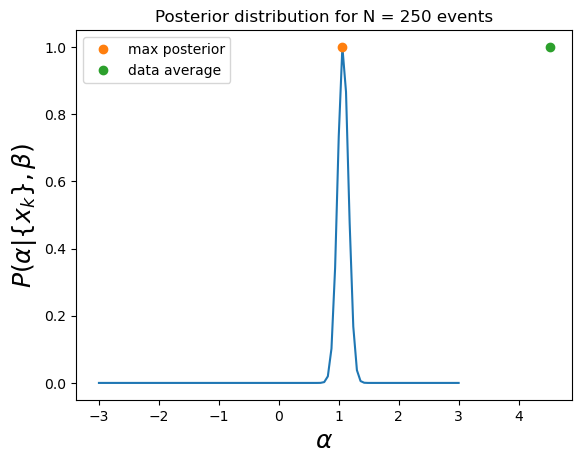

In [17]:
# 19)
def logposterior(alpha,x_samples,beta):
    return -1 * np.sum(np.log(np.power(x_samples-alpha,2)+beta**2))

# 20)
aa = np.linspace(-3,3,100)
llog = []
for a in aa:
    llog += [logposterior(a,x_samples,beta)]

llog = np.array(llog)
llog -= np.max(llog) # Subtract max value

# 21)
posterior = np.exp(llog)
plt.plot(aa,posterior)
plt.xlabel(r'$\alpha$',fontsize=18)
plt.ylabel(r'$P(\alpha|\{x_k\},\beta)$',fontsize=18)
plt.title('Posterior distribution for N = %d events' % N)

# 22)
ymax = np.max(posterior)
xpos = np.where(posterior == ymax)
alpha_max = aa[xpos]
plt.plot(alpha_max,ymax,'o',label='max posterior')
plt.plot(x_samples.mean(),ymax,'o',label='data average')
plt.legend()

print('maximum posterior estimate = %.3f' % alpha_max[0])

## 2.3. Comparing maximum posterior estimate and plain averaging

The best estimator for a mean $\mu$ of a normal distribution is simply given by the sample average. As in the limit of large numbers all distributions should behave as a normal distribution (this is the Central Limit Theorem) why didn't we just take the average of the $\lbrace x_k \rbrace$ and use that to estimate $\alpha$?

We will see here that in the present case, this is a bad idea!

> 23. Run the full procedure above 10 times. At each trial generate a new sample, then compare the maximum posterior estimate with the sample average. Do these result seem to agree ?
>
> 24. Now let's explore this problem by performing a large number of trials (say 100), Make a plot showing, as a function of the trial number, the posterior maximum estimate and the sample average with its standard deviation. What is your conclusion ? 


Trial 1
maximum posterior estimate = 1.061
alpha using average = 9.522 +- 5.465
Trial 2
maximum posterior estimate = 0.879
alpha using average = 0.527 +- 0.383
Trial 3
maximum posterior estimate = 0.939
alpha using average = -0.860 +- 1.168
Trial 4
maximum posterior estimate = 0.939
alpha using average = 2.048 +- 1.102
Trial 5
maximum posterior estimate = 1.061
alpha using average = 2.507 +- 1.844
Trial 6
maximum posterior estimate = 0.939
alpha using average = 1.432 +- 0.616
Trial 7
maximum posterior estimate = 0.879
alpha using average = 0.428 +- 0.792
Trial 8
maximum posterior estimate = 1.061
alpha using average = -18.649 +- 13.607
Trial 9
maximum posterior estimate = 0.939
alpha using average = 1.524 +- 0.665
Trial 10
maximum posterior estimate = 1.000
alpha using average = 1.677 +- 0.427


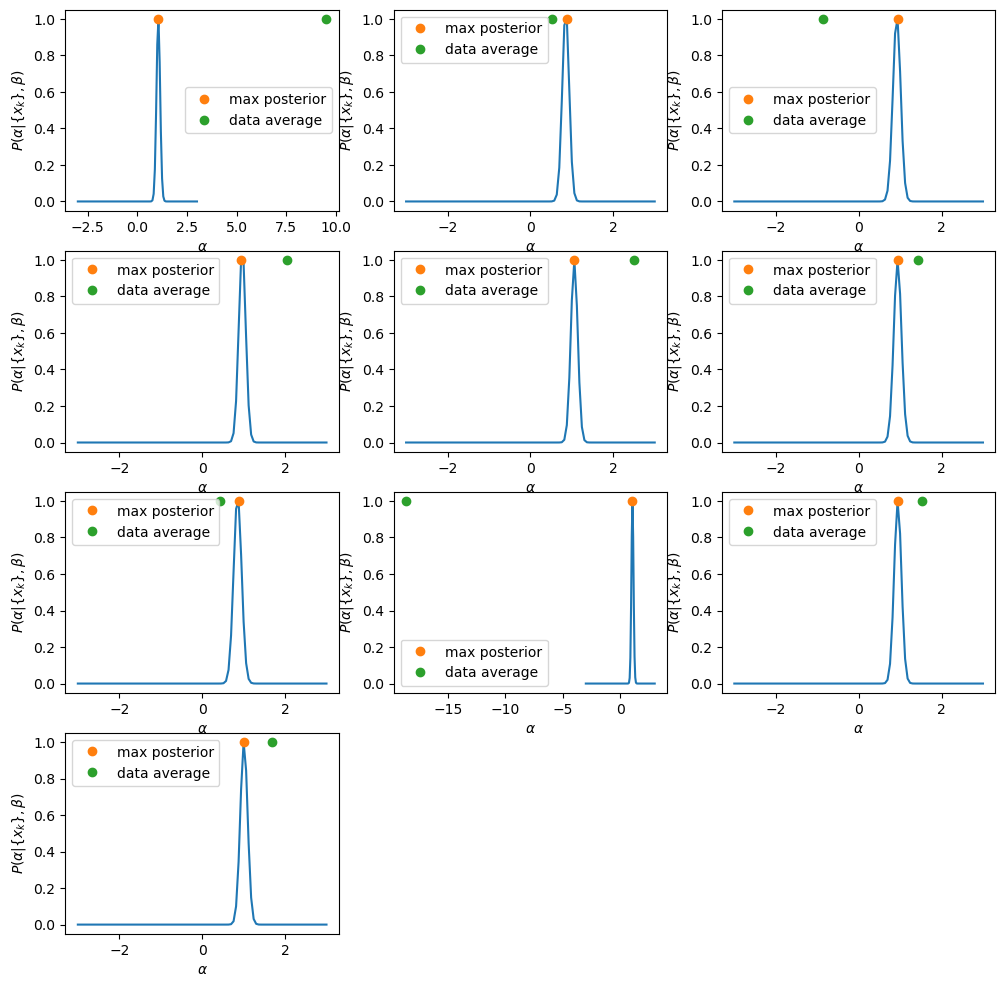

In [18]:
# 23)

Ntrial = 10

def runtrial(do_plot=True):

    # generate new data
    theta_samples, x_samples = generate_data(N)
    
    # Calculate posterior
    aa = np.linspace(-3,3,100)
    llog = []
    for a in aa:
        llog += [logposterior(a,x_samples,beta)]
        
    llog = np.array(llog)
    llog -= np.max(llog) # Subtract max value
    
    posterior = np.exp(llog)

    ymax = np.max(posterior)
    xpos = np.where(posterior == ymax)
    alpha_max = aa[xpos]

    sample_mean = x_samples.mean() # mean
    sample_mean_error = x_samples.std() / np.sqrt(N)
    
    if do_plot:
        plt.plot(aa,posterior)
        plt.xlabel(r'$\alpha$')
        plt.ylabel(r'$P(\alpha|\{x_k\},\beta)$')
        #plt.title('Posterior distribution for N = %d events' % N)

        plt.plot(alpha_max,ymax,'o',label='max posterior')
        plt.plot(x_samples.mean(),ymax,'o',label='data average')
        plt.legend()
   
    return alpha_max[0], sample_mean, sample_mean_error, np.median(x_samples)

plt.figure(figsize=(12,12))
for i in range(Ntrial):
    print('Trial %d' % (i+1))
    plt.subplot(4,3,i+1)
    alpha_max, sample_mean, sample_mean_error, sample_median = runtrial(True)
    print('maximum posterior estimate = %.3f' % alpha_max)
    print('alpha using average = %.3f +- %.3f' % (sample_mean,sample_mean_error))


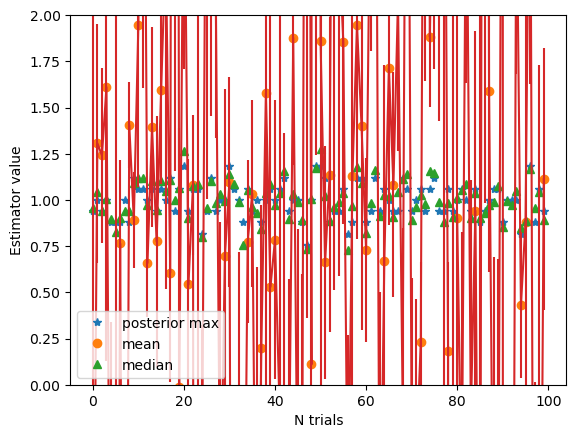

In [19]:
# 24)

Ntrial = 100

posterior_max = []
mean = []
mean_error = []
median = []

for i in range(Ntrial):
    alpha_max, sample_mean, sample_mean_error, sample_median = runtrial(False)
    posterior_max += [alpha_max]
    mean += [sample_mean]
    mean_error += [sample_mean_error]
    median += [sample_median]
    
plt.plot(range(Ntrial), posterior_max, '*',label='posterior max')
plt.plot(range(Ntrial), mean, 'o',label='mean')
plt.plot(range(Ntrial), median, '^',label='median')
plt.errorbar(range(Ntrial), mean, yerr=mean_error)
plt.ylim(0,2)
plt.xlabel('N trials')
plt.ylabel('Estimator value')
plt.legend()    

In [20]:
print('Mean of posterior max values: %.3f +- %.3f' %(np.array(posterior_max).mean(),np.array(posterior_max).std()))
print('Mean of median values: %.3f +- %.3f' %(np.array(median).mean(),np.array(median).std()))
print('Mean of average values: %.3f +- %.3f' %(np.array(mean).mean(),np.array(mean).std()))

Mean of posterior max values: 0.996 +- 0.092
Mean of median values: 0.999 +- 0.106
Mean of average values: -1.310 +- 24.249


Conclusion: you should observe that the estimate using the average has enormous variance. This is a consequence of the fact that the Cauchy distribution is very peculiar as it has no defined mean or variance! Therefore the Central Limit Theorem is not applicable to the Cauchy distribution.

The morale of this exercise is that the sample mean is not alway a good number to use, and in this particular case it is best to use more refined knowledge of the posterior pdf to determine what is best. Such knowledge can be gained by outputting samples from such distributions by Monte Carlo methods.

> 25. What other estimate than the averaged sample value could be used to estimate $\alpha$? Add this new estimator to your answer to the previous questions 23 and 24 

The median of the sample values.